Análisis de Datos

Grupo: 20

Tarea 5 Proyecto Análisis de Datos

Presentado por: Juan David meza

Código: 202016908

Tutor: Breyner Alexander Parra

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD

Regresión Logística


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,
                             precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para las gráficas
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [4]:
# Cargar el dataset
data = pd.read_csv('Titanic-Dataset.csv') 

In [6]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Descripción de los datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

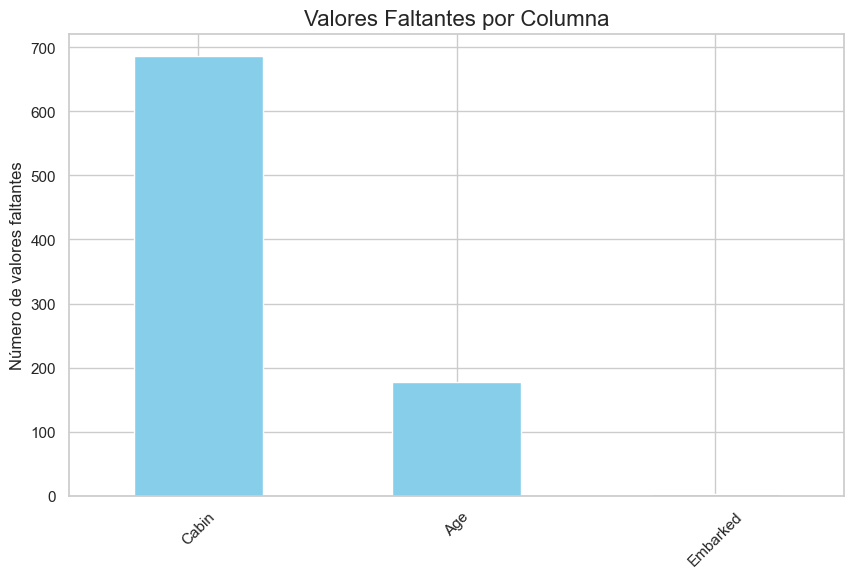

In [12]:
# Visualizar valores faltantes
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.title("Valores Faltantes por Columna", fontsize=16)
missing_values.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel("Número de valores faltantes", fontsize=12)
plt.xticks(rotation=45)
plt.show()

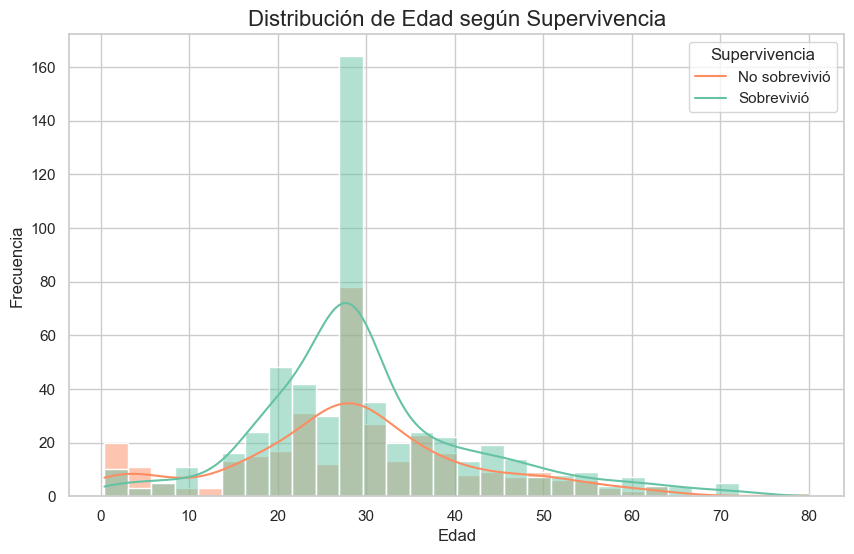

In [18]:
# Distribución de Edad según Supervivencia
sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30, palette='Set2')
plt.title('Distribución de Edad según Supervivencia', fontsize=16)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(labels=['No sobrevivió', 'Sobrevivió'], title='Supervivencia')
plt.show()

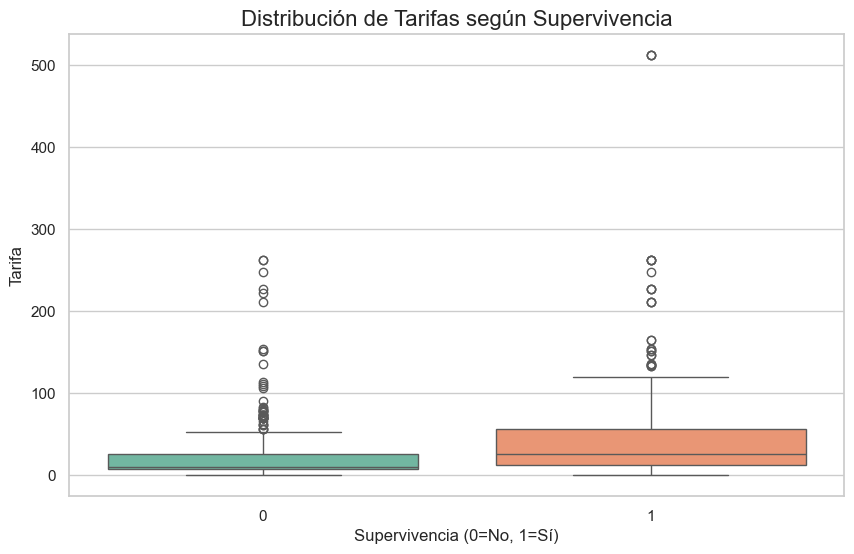

In [20]:
# Distribución de tarifas según Supervivencia
sns.boxplot(data=data, x='Survived', y='Fare', palette='Set2')
plt.title('Distribución de Tarifas según Supervivencia', fontsize=16)
plt.xlabel('Supervivencia (0=No, 1=Sí)')
plt.ylabel('Tarifa')
plt.show()

In [14]:
# Imputar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
# Eliminar columnas irrelevantes
data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)

In [24]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [26]:
# Separar características y etiqueta objetivo
X = data.drop('Survived', axis=1)
y = data['Survived']

In [28]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Balanceo de Clases con SMOTE 
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [32]:
print("\nDistribución de clases después de SMOTE:")
print(y_train_balanced.value_counts())


Distribución de clases después de SMOTE:
Survived
1    439
0    439
Name: count, dtype: int64


In [34]:
# Entrenamiento de Regresión Logística ---
# Crear un pipeline con escalado y modelo
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42, max_iter=500))
])

In [36]:
# Entrenar el modelo
logistic_pipeline.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=500, random_state=42))])

In [38]:
# Realizar predicciones
y_pred = logistic_pipeline.predict(X_test)
y_pred_prob = logistic_pipeline.predict_proba(X_test)[:, 1]

In [40]:
# Métricas de desempeño
print("\nMétricas de desempeño para Regresión Logística:")
print("Precisión:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Métricas de desempeño para Regresión Logística:
Precisión: 0.8156424581005587
Precision: 0.7647058823529411
Recall: 0.7536231884057971
F1-Score: 0.7591240875912408

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



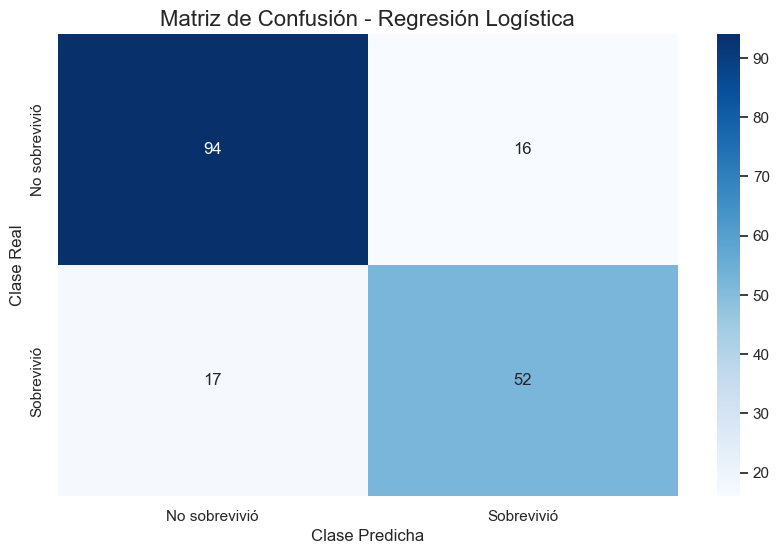

In [42]:
# Matriz de Confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No sobrevivió', 'Sobrevivió'],
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title("Matriz de Confusión - Regresión Logística", fontsize=16)
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

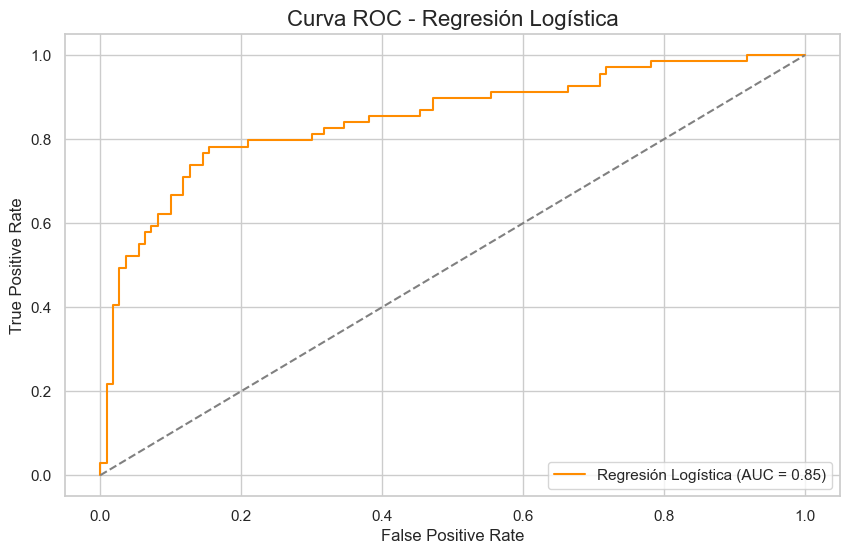

In [44]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Regresión Logística (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - Regresión Logística', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Interpretar, analizar y documentar los resultados obtenidos

El principal objetivo de este análisis fue crear un modelo predictivo que permitiera estimar si un pasajero del Titanic habría sobrevivido o no, basándonos en características como su género, clase, edad y lugar de embarque. Tras evaluar varios métodos, la Regresión Logística resultó ser la mejor opción debido a su desempeño sólido y su facilidad de interpretación

Análisis Exploratorio de Datos (EDA):
Se identificaron tendencias significativas en las variables género, edad, clase social (Pclass) y puerto de embarque (Embarked), las cuales presentaron relación directa con la supervivencia.
Algunas columnas, como Edad, tenían valores faltantes que fueron tratados con la mediana, mientras que otros valores faltantes en Embarked se reemplazaron con la moda.
Variables como Cabin y Ticket fueron descartadas al no aportar información relevante o contener demasiados datos ausentes

Preprocesamiento de los Datos:
Las variables categóricas se transformaron a un formato numérico mediante codificación, haciendo los datos utilizables para el modelo.Se implementó SMOTE para equilibrar las clases, ya que inicialmente la cantidad de pasajeros que sobrevivieron era mucho menor que los que no lo hicieron. Esto permitió mejorar el rendimiento del modelo, especialmente al identificar sobrevivientes.

Métricas de Desempeño:

Precisión (Accuracy): 81.56%, lo que indica que más del 81% de las predicciones fueron correctas.

Recall (para sobrevivientes): 75.36%, mostrando que el modelo identificó correctamente 3 de cada 4 pasajeros que realmente sobrevivieron.

F1-Score: 75.91%, evidenciando un buen balance entre precisión y recall para la clase positiva.

AUC (Área bajo la curva): 0.85, lo que refleja una buena capacidad del modelo para distinguir entre sobrevivientes y no sobrevivientes.

Matriz de Confusión:

De los 110 pasajeros que no sobrevivieron, 94 fueron clasificados correctamente, mientras que 16 fueron identificados erróneamente como sobrevivientes.Para la clase de pasajeros que sobrevivieron, el modelo identificó correctamente a 52 de los 69, aunque 17 fueron clasificados incorrectamente como no sobrevivientes.

Curva ROC:

La curva ROC muestra un área bajo la curva (AUC) de 0.85, lo cual es indicativo de un buen desempeño global del modelo en la clasificación de ambas clases.